In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,BatchNormalization,Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import warnings
import seaborn as sb
from tensorflow.keras.models import save_model,load_model
warnings.filterwarnings('ignore')

2024-06-16 11:01:04.650442: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-16 11:01:04.650556: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-16 11:01:04.790617: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train=ImageDataGenerator(rescale=1/255.0)
validation=ImageDataGenerator(rescale=1/255.0)

In [3]:
train_dataset=train.flow_from_directory('/kaggle/input/gender-classification-dataset/Training',target_size=(70,80),batch_size=3,class_mode='binary')
validation_dataset=train.flow_from_directory('/kaggle/input/gender-classification-dataset/Validation',target_size=(70,80),batch_size=3,class_mode='binary')

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [4]:
train_dataset.class_indices

{'female': 0, 'male': 1}

In [5]:
train_dataset.image_shape

(70, 80, 3)

In [6]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [7]:
i=Input(shape=train_dataset.image_shape)
x=Conv2D(32,(3,3),activation='relu',padding='same',strides=1)(i)
x=BatchNormalization()(x)
x=Conv2D(32,(3,3),activation='relu',padding='same',strides=1)(x)
x=BatchNormalization()(x)
x=MaxPool2D(pool_size=(2,2))(x)
x=Conv2D(64,(3,3),activation='relu',padding='same',strides=1)(x)
x=BatchNormalization()(x)
x=Conv2D(64,(3,3),activation='relu',padding='same',strides=1)(x)
x=BatchNormalization()(x)
x=MaxPool2D(pool_size=(2,2))(x)
x=Conv2D(128,(3,3),activation='relu',padding='same',strides=2)(x)
x=BatchNormalization()(x)
x=Conv2D(128,(3,3),activation='relu',padding='same',strides=2)(x)
x=BatchNormalization()(x)
x=MaxPool2D(pool_size=(2,2))(x)
x=Flatten()(x)

In [8]:
k=1
x=Dropout(0.2)(x)
x=Dense(1024,activation='relu')(x)
x=Dense(k,activation='sigmoid')(x)
model=Model(i,x)

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
train_dataset.n/10

4700.9

In [11]:
model.fit(train_dataset,steps_per_epoch=4700,validation_data=validation_dataset,epochs=12)

Epoch 1/12


2024-06-16 11:02:33.262974: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.15932, expected 1.35287
2024-06-16 11:02:33.263032: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 4.81888, expected 4.01243
2024-06-16 11:02:33.263045: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 4.82457, expected 4.01811
2024-06-16 11:02:33.263054: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.03053, expected 4.22408
2024-06-16 11:02:33.263068: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.75626, expected 4.94981
2024-06-16 11:02:33.263086: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 6.16037, expected 5.35391
2024-06-16 11:02:33.263099: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 4.0972, expected 3.29074
2024-06-16 11:02:33.263109: E external/local_xla/xla/ser

   7/4700 ━━━━━━━━━━━━━━━━━━━━ 1:27 19ms/step - accuracy: 0.4680 - loss: 2.8293

I0000 00:00:1718535758.351980      80 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718535758.379586      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


4699/4700 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8155 - loss: 0.4854

W0000 00:00:1718535854.385282      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


4700/4700 ━━━━━━━━━━━━━━━━━━━━ 186s 37ms/step - accuracy: 0.8155 - loss: 0.4853 - val_accuracy: 0.9197 - val_loss: 0.2124
Epoch 2/12
1615/4700 ━━━━━━━━━━━━━━━━━━━━ 49s 16ms/step - accuracy: 0.9145 - loss: 0.2224

2024-06-16 11:05:59.410135: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.65469, expected 1.73366
2024-06-16 11:05:59.410196: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 2.98142, expected 2.06039
2024-06-16 11:05:59.410206: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 3.42592, expected 2.50489
2024-06-16 11:05:59.410214: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 4.06073, expected 3.1397
2024-06-16 11:05:59.410221: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.83383, expected 2.9128
2024-06-16 11:05:59.410229: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 4.10672, expected 3.18569
2024-06-16 11:05:59.410236: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 3.93345, expected 3.01242
2024-06-16 11:05:59.410261: E external/local_xla/xla/serv

4700/4700 ━━━━━━━━━━━━━━━━━━━━ 94s 20ms/step - accuracy: 0.9173 - loss: 0.2186 - val_accuracy: 0.9167 - val_loss: 0.2119
Epoch 3/12
4700/4700 ━━━━━━━━━━━━━━━━━━━━ 74s 16ms/step - accuracy: 0.9253 - loss: 0.1981 - val_accuracy: 0.9431 - val_loss: 0.1465
Epoch 4/12
4700/4700 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.9327 - loss: 0.1861 - val_accuracy: 0.9190 - val_loss: 0.2404
Epoch 5/12
4700/4700 ━━━━━━━━━━━━━━━━━━━━ 58s 12ms/step - accuracy: 0.9390 - loss: 0.1685 - val_accuracy: 0.9402 - val_loss: 0.1521
Epoch 6/12
4700/4700 ━━━━━━━━━━━━━━━━━━━━ 53s 11ms/step - accuracy: 0.9451 - loss: 0.1501 - val_accuracy: 0.9398 - val_loss: 0.1552
Epoch 7/12
4700/4700 ━━━━━━━━━━━━━━━━━━━━ 47s 10ms/step - accuracy: 0.9473 - loss: 0.1503 - val_accuracy: 0.9342 - val_loss: 0.1734
Epoch 8/12
4700/4700 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.9499 - loss: 0.1328 - val_accuracy: 0.9538 - val_loss: 0.1282
Epoch 9/12
4700/4700 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - accuracy: 0.9476 - loss: 0.1432 

In [12]:
save_model(model,'/kaggle/working/model.h5')

In [13]:
model_dict=model.history.history

In [14]:
def plot_loss(model_dict):
    loss=model_dict['loss']
    val_loss=model_dict['val_loss']
    sb.lineplot(loss,label='loss',color='red')
    sb.lineplot(val_loss,label='val_loss',color='g')
    plt.legend()

In [15]:
def plot_acc(model_dict):
    accuracy=model_dict['accuracy']
    val_accuracy=model_dict['val_accuracy']
    sb.lineplot(accuracy,label='accuracy',color='red')
    sb.lineplot(val_accuracy,label='val_accuracy',color='g')
    plt.legend()

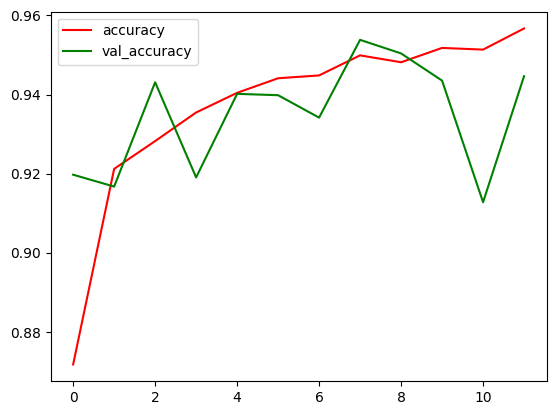

In [16]:
plot_acc(model_dict)

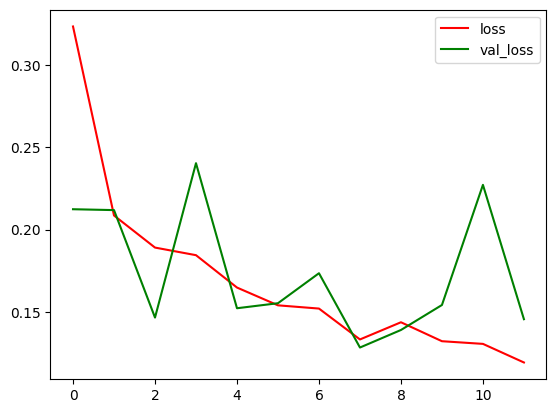

In [17]:
plot_loss(model_dict)

**Implementation of Prediction**

In [18]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import load_model
import numpy as np

In [19]:
model=load_model('/kaggle/working/model.h5')

In [20]:
img_path='/kaggle/input/gender-classification-dataset/Validation/male/063460.jpg.jpg'

In [21]:
def male_or_female(img_path,model):
    img=load_img(img_path,target_size=(70,80))
    img_array=img_to_array(img)
    img_array=img_array/255.0
    new_array_with_batch_dimension=np.expand_dims(img_array,axis=0)
    output=model.predict(new_array_with_batch_dimension)
    output=np.round(output.flatten())[0]
    val="Male" if output==1 else 'Female'
    return val

In [22]:
male_or_female(img_path,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 970ms/step


'Male'